# Predict Credit Card Fraud


## Table of Contents
* [1. Problem Statement](#1.-Problem-Statement)  
* [2. Objective](#2.-Objective) 
* [3. Import all scientific and visualization packages](#3.-Import-all-scientific-and-visualization-packages)
* [4. Loading the datasets](#4.-Loading-the-datasets)
    * [4.1 Understand datatypes present in dataframe](#4.1-Understand-datatypes-present-in-dataframe)
* [5. Data Visualization](#5.-Data-Visualization)
    * [5.1 Distribution of amount in credit card transactions](#5.1-Distribution-of-amount-in-credit-card-transactions)
    * [5.2 Distribution of time that transactions were conducted for both fraudulent as well as non fraudulent.](#5.2-Distribution-of-time-that-transactions-were conducted-for-both-fraudulent-as-well-as-non-fraudulent)
    * [5.3 Distribution of attribute V4 for fraudulent and non fraudulent transactions](#5.3-Distribution-of-V4-for-fraudulent- and-non-fraudulent-transactions)
    * [5.4 Scatter plot between time of transaction and amount of transaction](#5.4-Scatter-plot-between-time-of transaction and amount of transaction)
    * [ 5.5 Correlation Heatmap](#5.5-Correlation-Heatmap)
* [6. Handle imbalanced data using SMOTE](#6.-Handle imbalanced data using SMOTE)
    * [6.1 Prepare the data](#6.1-Prepare-the-data)
    * [6.2 Train a logistic regression model](#6.2-Train-a-logistic-regression-model)
    * [6.3 Train a decision tree model](#6.3-Train-a-decision-tree-model)
    * [6.4 Train a random forest classifier model](#6.4-Train-a-random-forest-classifier-model)
    

### 1. Problem Statement

Due to prevalent fraud in finance domain, it is imperative for credit card companies to be able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
The datasets contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.

### 2. Objective

Classify fraudulent transaction from non fraudulent transactions using machine learning algorithms.

### 3. Import all scientific and visualization packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

## visualization packages

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


C:\Users\RM00537892\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 4. Loading the datasets

In [3]:
credit_card_df = pd.read_csv('creditcard.csv')

In [4]:
credit_card_df.shape

(284807, 31)

In [5]:
# print the first 5 rows of data
credit_card_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


#### 4.1 Understand datatypes present in dataframe

In [6]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

There are no missing values in this dataframe. So data imputation is **not** required.

### 5. Data Visualization

#### 5.1 Distribution of amount in credit card transactions

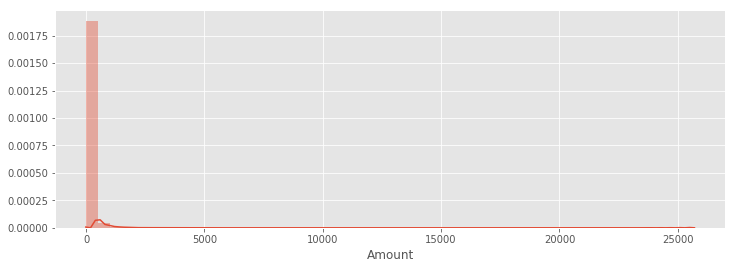

In [7]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(12,4))
sns.distplot(credit_card_df['Amount'])

The distribution is right skewed with very less transactions towards the higher amounts.

#### 5.2 Distribution of time that transactions were conducted for both fraudulent as well as non fraudulent.

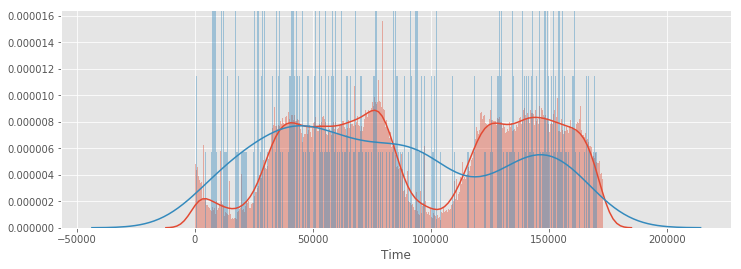

In [8]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(12,4))
sns.set_color_codes("pastel")
sns.distplot(credit_card_df['Time'],kde=True,bins=480)
sns.distplot(credit_card_df.loc[credit_card_df['Class'] == 1, 'Time'],kde=True,bins=480)


The time for fraudulent transactions is almost uniformly distributed with a certain level of **repetition or seasonality** after some interval of time.

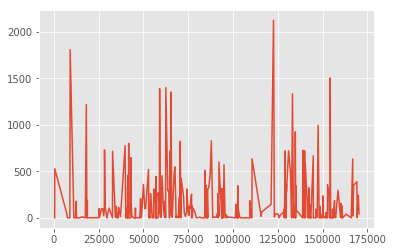

In [9]:
credit_card_df.loc[credit_card_df['Class'] == 1, 'Time']
plt.plot(credit_card_df.loc[credit_card_df['Class'] == 1, 'Time'],credit_card_df.loc[credit_card_df['Class'] == 1, 'Amount'])
plt.show()

#### 5.3 Distribution of V4 for fraudulent and non fraudulent transactions

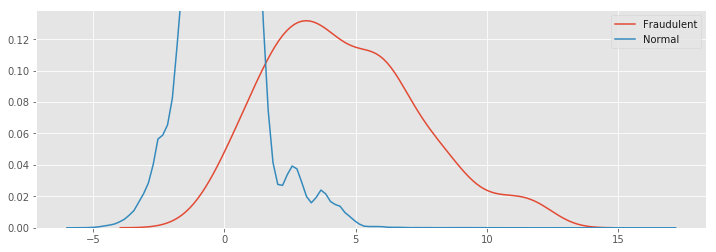

In [10]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(12,4))
sns.set_color_codes("pastel")

sns.kdeplot(credit_card_df.loc[credit_card_df['Class'] == 1, 'V4'],label='Fraudulent')
sns.kdeplot(credit_card_df.loc[credit_card_df['Class'] == 0, 'V4'],label='Normal')


It is quite evident that fraudulent and normal transactions are almost separated through this graph with the help of V4 attribute.

#### 5.4 Scatter plot between time of transaction and amount of transaction

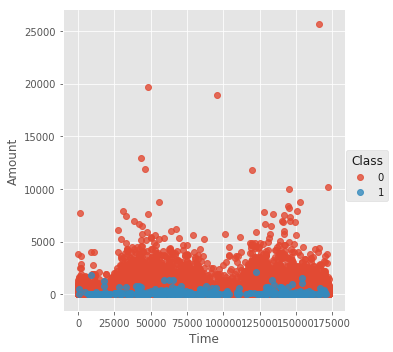

In [11]:
plt.figure(figsize=(15,10))
sns.lmplot('Time', # Horizontal axis
           'Amount', # Vertical axis
           data=credit_card_df, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="Class", # Set color
        ) 


It is evident that Fraudulent transactions are mostly below an amount of 1000 and never more than that.

#### 5.5 Correlation Heatmap

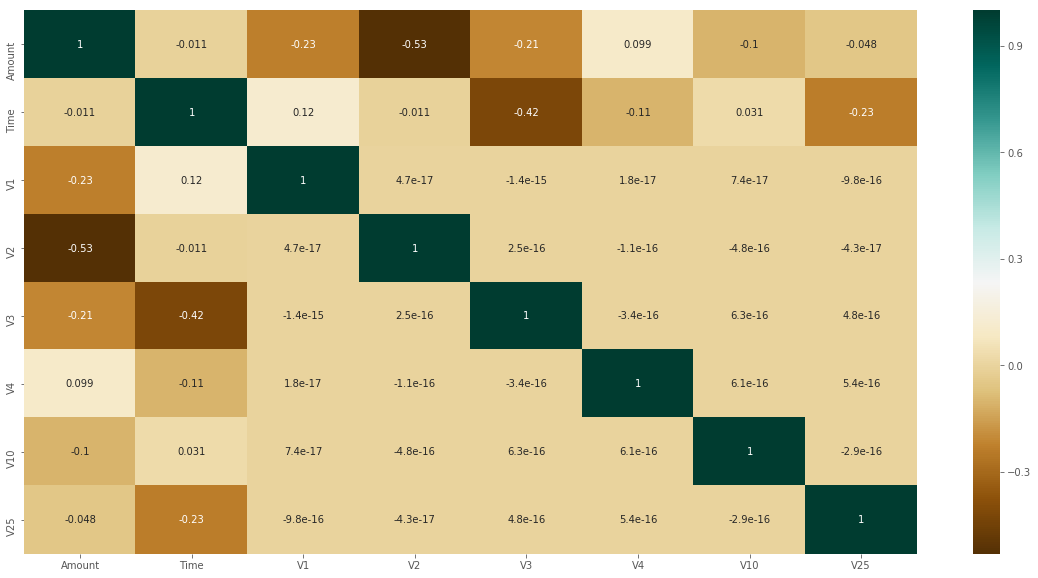

In [12]:
plt.figure(figsize=(20,10))
c = credit_card_df[['Amount','Time','V1','V2','V3','V4','V10','V25']].corr()
sns.heatmap(c,cmap="BrBG",annot=True)

Amount is negatively correlated with V2
Time is negatively correlated with V3

### 6. Handle imbalanced data using SMOTE

#### 6.1 Prepare the data

In [13]:
X = credit_card_df.drop(['Class'],axis=1)

y = credit_card_df.Class

In [14]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [19]:
#!pip install imblearn

  Using cached https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e5/4c/7557e1c2e791bd43878f8c82065bddc5798252084f26ef44527c02262af1/imbalanced_learn-0.4.3-py3-none-any.whl


You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

#plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.33, random_state=42)

In [22]:
X_train.shape

(380982, 30)

#### 6.2 Train a logistic regression model

In [23]:
# train a logistic regression model on the training set

logreg = LogisticRegression(C=0.8)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)
# calculate accuracy with threshold of 0.5
print(metrics.accuracy_score(y_test, y_pred_class))

0.964524002387


In [25]:
# examine the class distribution of the testing set
pd.Series(y_test).value_counts()

1    93873
0    93775
dtype: int64

In [26]:
# calculate null accuracy 
pd.Series(y_test).value_counts().head(1) / len(y_test)

1    0.500261
dtype: float64

Accuracy is not an appropriate metric in this scenario. We employ confusion matrix and ROC curve to further understand performance of our model on test data.

In [27]:
conf=metrics.confusion_matrix(y_test, y_pred_class)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[92371  1404]
 [ 5253 88620]]


Here the false negatives are very high which means around 3739 are wrongly classifed as non-defaulters when in reality they are defaulters.

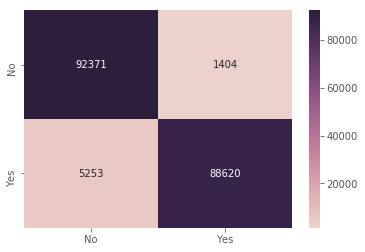

In [28]:
cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True, fmt="d")

In [29]:
predict_probabilities = logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

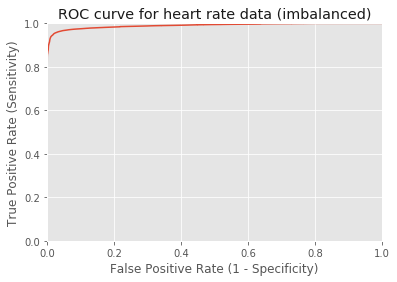

In [30]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for heart rate data (imbalanced)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [31]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.989801
